In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

class PositionalEncoding(layers.Layer):
    def __init__(self, input_size, hidden_size):
        super(PositionalEncoding, self).__init__()
        self.positional_encoding = self._get_positional_encoding(input_size, hidden_size)

    def call(self, inputs):
        return inputs + self.positional_encoding[:, :tf.shape(inputs)[1], :]

    def _get_positional_encoding(self, input_size, hidden_size):
        angle_rads = self._get_angles(input_size, hidden_size)

        # Apply sin to even indices in the array
        angle_rads[:, 0::2] = tf.sin(angle_rads[:, 0::2])

        # Apply cos to odd indices in the array
        angle_rads[:, 1::2] = tf.cos(angle_rads[:, 1::2])

        pos_encoding = angle_rads[np.newaxis, ...]
        return tf.cast(pos_encoding, dtype=tf.float32)

    def _get_angles(self, input_size, hidden_size):
        positions = np.arange(input_size)[:, np.newaxis]
        indices = np.arange(hidden_size)[np.newaxis, :]
        angle_rates = 1 / np.power(10000, (2 * (indices // 2)) / np.float32(hidden_size))
        return positions * angle_rates


class TransformerLayer(layers.Layer):
    def __init__(self, hidden_size, num_heads):
        super(TransformerLayer, self).__init__()
        self.mha = layers.MultiHeadAttention(num_heads, hidden_size)
        self.dropout = layers.Dropout(0.1)
        self.norm = layers.LayerNormalization(epsilon=1e-6)
        self.ffn = keras.Sequential(
            [layers.Dense(hidden_size, activation="relu"), layers.Dense(hidden_size)]
        )

    def call(self, x, training):
        # Attention
        attn_output = self.mha(x, x, training=training)
        attn_output = self.dropout(attn_output, training=training)
        res = self.norm(x + attn_output)
        # Feed Forward
        ffn_output = self.ffn(res)
        ffn_output = self.dropout(ffn_output, training=training)
        return self.norm(res + ffn_output)


class Transformer(tf.keras.Model):
    def __init__(self, input_size, hidden_size, num_layers, num_heads):
        super(Transformer, self).__init__()

        self.embedding = layers.Embedding(input_size, hidden_size)
        self.pos_encoding = PositionalEncoding(input_size, hidden_size)
        self.decoder = [TransformerLayer(hidden_size, num_heads) for _ in range(num_layers)]
        self.output_layer = layers.Dense(input_size)
        # self.output_layer = layers.Dense(input_size, activation="softmax")

    def call(self, x, training=True):
        x = self.embedding(x)
        x = self.pos_encoding(x)

        for decoder_layer in self.decoder:
            x = decoder_layer(x, training)

        output = self.output_layer(x)

        return output


# 1D helix functions with 5 different parameters
x = r cos(t)

In [36]:
# if torch is not installed:
# !pip install torch

In [37]:
import pandas as pd
import torch
import random

# x = r cos(t)
# 5000 data points, 1000 from each helix of a specific r
# each data point contains a x value and a class number idenfiying
#    the helix of a specific r
training_data = torch.zeros(1000,2).numpy()
test_data = torch.zeros(100,2).numpy()
training_data.shape

(1000, 2)

In [38]:
# 5 random r values
rand_r = np.random.rand(5)
rand_r

array([0.91317374, 0.09317585, 0.55477102, 0.33504266, 0.0169621 ])

In [39]:
class_id = 0
for r in rand_r:
    # generate training data
    t = np.random.rand(200)
    x = r * np.cos(t)
    training_data[class_id*200:(class_id+1)*200,0] = class_id
    training_data[class_id*200:(class_id+1)*200,1] = x
    
    # generate test data
    t = np.random.rand(20)
    x = r * np.cos(t)
    test_data[class_id*20:(class_id+1)*20,0] = class_id
    test_data[class_id*20:(class_id+1)*20,1] = x
    class_id += 1
training_data

array([[0.        , 0.59698564],
       [0.        , 0.7825405 ],
       [0.        , 0.80755895],
       ...,
       [4.        , 0.00930959],
       [4.        , 0.00956366],
       [4.        , 0.01438977]], dtype=float32)

import matplotlib.pyplot as plt
from cycler import cycler

my_colours = ['steelblue', 'seagreen', 'firebrick']
custom_cycler = cycler(color=my_colours)

fig, ax = plt.subplots()
ax.set_prop_cycle(custom_cycler)
ax.plot()
plt.show()

In [40]:
test_data

array([[0.        , 0.9120579 ],
       [0.        , 0.9030573 ],
       [0.        , 0.6231888 ],
       [0.        , 0.49788636],
       [0.        , 0.5136221 ],
       [0.        , 0.86768633],
       [0.        , 0.8891433 ],
       [0.        , 0.6634546 ],
       [0.        , 0.74076754],
       [0.        , 0.91264385],
       [0.        , 0.9088455 ],
       [0.        , 0.6715066 ],
       [0.        , 0.6014248 ],
       [0.        , 0.90327144],
       [0.        , 0.8518067 ],
       [0.        , 0.6481912 ],
       [0.        , 0.68806165],
       [0.        , 0.8421999 ],
       [0.        , 0.62375504],
       [0.        , 0.8147776 ],
       [1.        , 0.05418544],
       [1.        , 0.08325484],
       [1.        , 0.05096076],
       [1.        , 0.05640427],
       [1.        , 0.09188379],
       [1.        , 0.08861949],
       [1.        , 0.08415237],
       [1.        , 0.09138577],
       [1.        , 0.06756537],
       [1.        , 0.05160757],
       [1.

In [41]:
# shuffle by rows in training and test sets
np.random.shuffle(training_data)
np.random.shuffle(test_data)
test_data

array([[1.        , 0.05640427],
       [3.        , 0.27681455],
       [1.        , 0.0866776 ],
       [1.        , 0.09188379],
       [4.        , 0.01196936],
       [0.        , 0.9088455 ],
       [1.        , 0.05418544],
       [4.        , 0.01498829],
       [3.        , 0.33153123],
       [2.        , 0.40368184],
       [1.        , 0.08181652],
       [2.        , 0.52595943],
       [3.        , 0.3313518 ],
       [2.        , 0.5013083 ],
       [0.        , 0.91264385],
       [3.        , 0.28817734],
       [3.        , 0.19870715],
       [3.        , 0.32999203],
       [3.        , 0.18691638],
       [4.        , 0.01504418],
       [1.        , 0.09204447],
       [2.        , 0.45407778],
       [0.        , 0.9030573 ],
       [0.        , 0.49788636],
       [1.        , 0.05508128],
       [4.        , 0.01289888],
       [0.        , 0.5136221 ],
       [0.        , 0.62375504],
       [0.        , 0.86768633],
       [1.        , 0.08693304],
       [0.

In [42]:
training_data = training_data.T

In [43]:
training_data

array([[0.        , 0.        , 3.        , ..., 4.        , 0.        ,
        3.        ],
       [0.50611883, 0.7596981 , 0.29337126, ..., 0.00987878, 0.91124326,
        0.33133155]], dtype=float32)

In [44]:
test_data = test_data.T

In [45]:
# Hyperparameters
input_size = 1000  # Example: Range of input numbers
hidden_size = 64
num_layers = 2
num_heads = 4
learning_rate = 0.001
num_epochs = 500

# Define the loss function and optimizer
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

# Create the transformer model
model = Transformer(input_size, hidden_size, num_layers, num_heads)


In [46]:
import matplotlib.pyplot as plt

# Lists to store the loss values and epochs
loss_history = []
epoch_history = []



# Training loop
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:

    
#        n = 10-1  # Define the length of your lists
#        start = random.randint(0, input_size - 3)  # Start with a random integer
#        training_data = [start + 2*i for i in range(n)]
#        target_values = [x + 2 for x in training_data]
        
        # Separating x values and class labels
        tgt, data = training_data
        # Convert training data to tensors
        data = tf.constant([data])
        tgt = tf.constant([tgt])

        # Forward pass
        output = model(data, training=True)

        # Calculate loss
        loss = loss_function(tgt, output)
        # Append the loss and epoch to the history lists
        loss_history.append(loss.numpy())
        epoch_history.append(epoch)

        if epoch % 100 == 0 or epoch == (num_epochs-1):
            print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.numpy():.4f}")
            print (training_data)


    # Perform gradient descent
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))


Epoch [0/500], Loss: 6.9203
[[0.         0.         3.         ... 4.         0.         3.        ]
 [0.50611883 0.7596981  0.29337126 ... 0.00987878 0.91124326 0.33133155]]
Epoch [100/500], Loss: 1.6403
[[0.         0.         3.         ... 4.         0.         3.        ]
 [0.50611883 0.7596981  0.29337126 ... 0.00987878 0.91124326 0.33133155]]
Epoch [200/500], Loss: 1.5023
[[0.         0.         3.         ... 4.         0.         3.        ]
 [0.50611883 0.7596981  0.29337126 ... 0.00987878 0.91124326 0.33133155]]
Epoch [300/500], Loss: 0.9268
[[0.         0.         3.         ... 4.         0.         3.        ]
 [0.50611883 0.7596981  0.29337126 ... 0.00987878 0.91124326 0.33133155]]
Epoch [400/500], Loss: 0.4371
[[0.         0.         3.         ... 4.         0.         3.        ]
 [0.50611883 0.7596981  0.29337126 ... 0.00987878 0.91124326 0.33133155]]
Epoch [499/500], Loss: 0.2353
[[0.         0.         3.         ... 4.         0.         3.        ]
 [0.50611883 0

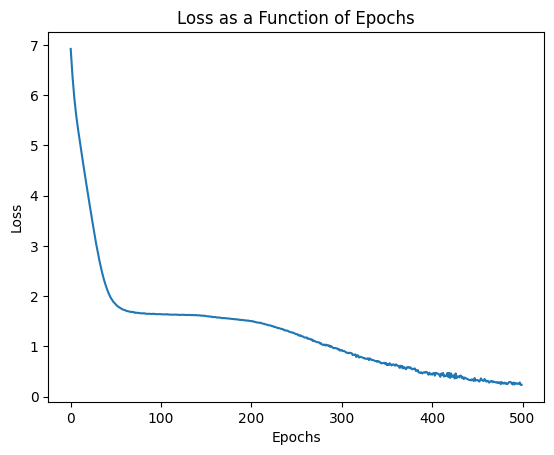

In [47]:
# Plot the loss history
plt.plot(epoch_history, loss_history)
plt.title('Loss as a Function of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [48]:
model.summary()

Model: "transformer_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     multiple                  64000     
                                                                 
 positional_encoding_3 (Posi  multiple                 0         
 tionalEncoding)                                                 
                                                                 
 transformer_layer_6 (Transf  multiple                 74816     
 ormerLayer)                                                     
                                                                 
 transformer_layer_7 (Transf  multiple                 74816     
 ormerLayer)                                                     
                                                                 
 dense_19 (Dense)            multiple                  65000     
                                                     

In [49]:
# Make predictions
tgt, data = test_data
# Convert test data to tensors
data = tf.constant([data])
tgt = tf.constant([tgt])

predictions = model(data, training=False)

In [50]:
print (predictions)

tf.Tensor(
[[[ 5.480685   8.22264    2.52305   ... -3.5081325 -3.1813214 -3.683815 ]
  [ 4.5892944  8.975171   2.4221592 ... -3.5622852 -3.218368  -3.8082538]
  [ 3.1514857  9.700153   2.2368402 ... -3.9719663 -3.635249  -4.091427 ]
  ...
  [ 6.29658    8.492671   2.1470544 ... -4.8509045 -4.337636  -4.21937  ]
  [ 6.291038   8.314637   2.0401568 ... -4.7992716 -4.2875257 -4.3015423]
  [ 6.9339547  7.8267174  2.9426193 ... -4.2635727 -3.9416363 -4.046296 ]]], shape=(1, 100, 1000), dtype=float32)


In [51]:
loss = loss_function(tgt, predictions)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=3.722125>

# Print the predicted values
predicted_values = predictions.numpy().tolist()

print (predicted_values)
for i, prediction in enumerate(predicted_values):
    
    print(f"Predicted class for number {test_data[i]} is : {prediction}")


model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=1000,
    callbacks=callbacks,
)